<a href="https://colab.research.google.com/github/jsong55/Machine_Learning/blob/master/03_introduction_to_computer_vision_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to CNN and computer vision with tensorflow

In [ ]:
# get the data
import zipfile
import tensorflow as tf

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzipo the downloade file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-10-13 00:02:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.188.208, 142.251.16.128, 172.217.9.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.188.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   190MB/s    in 0.5s    

2022-10-13 00:02:25 (190 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
## inspect the data
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os
# walk through the directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# the extra file in pizza-steak directory is ".DS_store"  

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
# another way to find how many images
num_stea_images_train = len(os.listdir("pizza_steak/train/steak"))
num_stea_images_train

750

In [ ]:
# To visualize images, first get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # create a list of class_names from the subdirectory
print(class_names)

['pizza' 'steak']


In [ ]:
# let's visualize images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup the target directory
  target_folder = target_dir+target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder),1)

  #read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape: {img.shape}") # show the image shape

  return img

image shape: (512, 512, 3)


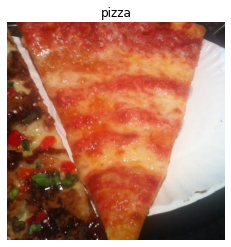

In [ ]:
# vuew a random image from training set
img = view_random_image(target_dir="pizza_steak/train/",
            target_class = "pizza")

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 40,  21,  14],
        [ 42,  25,  17],
        [ 44,  27,  19],
        ...,
        [ 45,  41,  38],
        [ 51,  47,  44],
        [ 43,  40,  35]],

       [[ 34,  17,   9],
        [ 37,  20,  12],
        [ 39,  22,  14],
        ...,
        [ 45,  41,  38],
        [ 50,  47,  42],
        [ 55,  52,  47]],

       [[ 41,  24,  17],
        [ 41,  24,  17],
        [ 39,  24,  17],
        ...,
        [ 50,  47,  42],
        [ 43,  38,  34],
        [ 42,  37,  33]],

       ...,

       [[ 88,  73,  50],
        [122, 107,  84],
        [141, 125, 102],
        ...,
        [ 10,  11,  13],
        [  9,  10,  12],
        [ 10,  11,  13]],

       [[ 73,  60,  41],
        [ 96,  83,  64],
        [114,  99,  80],
        ...,
        [ 10,  11,  13],
        [ 10,  11,  13],
        [ 11,  12,  14]],

       [[ 73,  60,  43],
        [ 87,  74,  57],
        [ 90,  77,  60],
        ...,
        [ 10,  11,  1

In [ ]:
# Get all the pixel values between 0&1
img/255.

array([[[0.15686275, 0.08235294, 0.05490196],
        [0.16470588, 0.09803922, 0.06666667],
        [0.17254902, 0.10588235, 0.0745098 ],
        ...,
        [0.17647059, 0.16078431, 0.14901961],
        [0.2       , 0.18431373, 0.17254902],
        [0.16862745, 0.15686275, 0.1372549 ]],

       [[0.13333333, 0.06666667, 0.03529412],
        [0.14509804, 0.07843137, 0.04705882],
        [0.15294118, 0.08627451, 0.05490196],
        ...,
        [0.17647059, 0.16078431, 0.14901961],
        [0.19607843, 0.18431373, 0.16470588],
        [0.21568627, 0.20392157, 0.18431373]],

       [[0.16078431, 0.09411765, 0.06666667],
        [0.16078431, 0.09411765, 0.06666667],
        [0.15294118, 0.09411765, 0.06666667],
        ...,
        [0.19607843, 0.18431373, 0.16470588],
        [0.16862745, 0.14901961, 0.13333333],
        [0.16470588, 0.14509804, 0.12941176]],

       ...,

       [[0.34509804, 0.28627451, 0.19607843],
        [0.47843137, 0.41960784, 0.32941176],
        [0.55294118, 0

## An end-to-end example

* build a CNN to find patterns in images
* preprocess images
* build a CNN
* compile
* fit the trining data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# preprocessing data, scale/noramliza data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup path to image directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                        batch_size=32,
                        target_size=(224,224),
                        class_mode="binary",
                        seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                        batch_size=32,
                        target_size=(224,224),
                        class_mode="binary",
                        seed=42)

# build a CNN model (same as the tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                kernel_size=3,
                activation="relu",
                input_shape=(224,224,3)),   
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile our CNN
model_1.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
              epochs=5,
              steps_per_epoch=len(train_data),
              validation_data=valid_data,
              validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 209ms/step - loss: 0.5579 - accuracy: 0.7167 - val_loss: 0.4032 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4247 - accuracy: 0.8047 - val_loss: 0.3258 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4115 - accuracy: 0.8173 - val_loss: 0.3594 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3866 - accuracy: 0.8233 - val_loss: 0.4740 - val_accuracy: 0.7560
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.3788 - accuracy: 0.8380 - val_loss: 0.3001 - val_accuracy: 0.8760


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Try the old model

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"])

history_2 = model_2.fit(train_data,
              epochs=5,
              steps_per_epoch=len(train_data),
              validation_data=valid_data,
              validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 185ms/step - loss: 0.9521 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


## Binary classification
1. Become one with the data
2. Preprocess the data
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat baseline)
7. Repeat until satisfied

### 1. Become one with the data

image shape: (512, 384, 3)
image shape: (512, 512, 3)


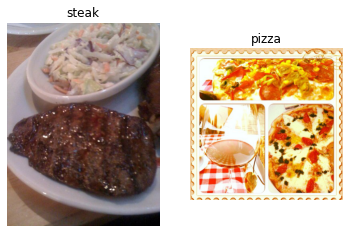

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
steak_img = view_random_image("pizza_steak/train/","pizza")

### 2. Preprocess the data

In [ ]:
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

Next step is turn data into batches

A batch is a small subset of data,

It does this for several reasons:
1. All the images might not fit into the memory
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Recommended value is 32

In [ ]:
# create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                        target_size=(224,224),
                        class_mode='binary',
                        batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                        target_size=(224,224),
                        class_mode='binary',
                        batch_size=32)
# get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


(32, 32)

### 3. Create a CNN baseline model
A baseline is a relatively simple model

In [ ]:
# make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model_4 = Sequential([
  Conv2D(filters=10, # the number of sliding windows going across the input (higher=more complex model)
    kernel_size=3, # the side of the sliding window
    strides=1,
    padding="valid",# same=output shape is the same as input, valid=output shape gets compressed
    activation="relu",
    input_shape=(224,224,3)),
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
  Flatten(),
  Dense(1,activation='sigmoid') # working with binary classification so only 1 outpout neuron
])

In [ ]:
# compile the model
model_4.compile(loss="binary_crossentropy",
        optimizer=Adam(),
        metrics=["accuracy"])

### Fit the model

In [ ]:
history_4 = model_4.fit(train_data,
              epochs=5,
              steps_per_epoch=len(train_data),
              validation_data=test_data,
              validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 202ms/step - loss: 0.7526 - accuracy: 0.6933 - val_loss: 0.4856 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4420 - accuracy: 0.8207 - val_loss: 0.3944 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.2936 - accuracy: 0.8980 - val_loss: 0.5081 - val_accuracy: 0.7520
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.1660 - accuracy: 0.9453 - val_loss: 0.4592 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.0853 - accuracy: 0.9780 - val_loss: 0.4487 - val_accuracy: 0.8260


In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7)) # plot the training curve

NameError: ignored

### 5. Evaluating our model

In [ ]:


# plot the validation and traing curves separately
def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics
  """
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["loss"]))

  # plot loss
  plt.figure()
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

When a model's validation loss starts in increase, it's likely the model is overfitting the training dataset. This meanns, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished

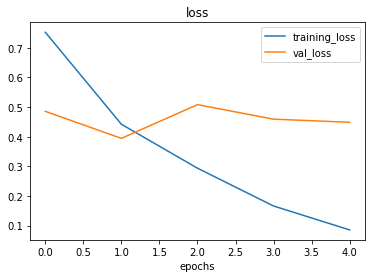

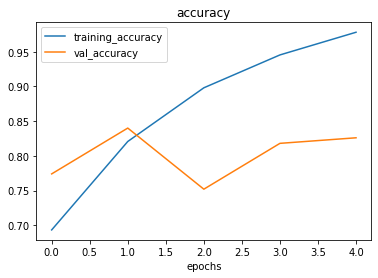

In [ ]:
# check out the accuracy and loss
plot_loss_curves(history_4)

### 6. Adjust the model parameters:

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a large model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Ways to reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data

Reducing overfitting also known as regularizatoin

In [ ]:
# Create the model
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
        optimizer=Adam(),
        metrics=["accuracy"])
history_5 = model_5.fit(train_data,
              epochs=5,
              steps_per_epoch=len(train_data),
              validation_data=test_data,
              validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 209ms/step - loss: 0.5763 - accuracy: 0.6967 - val_loss: 0.5452 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4704 - accuracy: 0.7807 - val_loss: 0.3886 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4437 - accuracy: 0.7987 - val_loss: 0.3770 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4392 - accuracy: 0.8020 - val_loss: 0.3666 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3863 - accuracy: 0.8353 - val_loss: 0.3476 - val_accuracy: 0.8560


In [ ]:
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

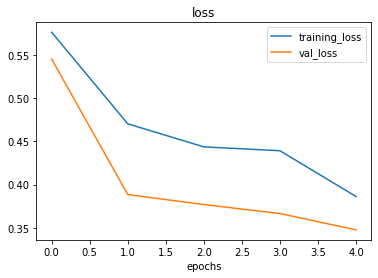

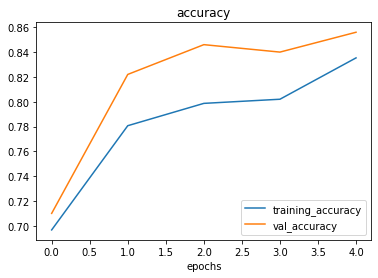

In [ ]:
plot_loss_curves(history_5)

### Data Augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                      rotation_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.2,
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      horizontal_flip=True)

# Create ImageDataGenerator without data augmnentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data aumentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)


Data aumentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping, cropping, etc.

In [ ]:
print("Augemted training data:")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                target_size=(224,224),
                                batch_size=32,
                                class_mode="binary",
                                shuffle=False)
print("Non-augemted training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode="binary",
                        shuffle=False)
print("Non-augemted test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                        target_size=(224,224),
                        batch_size=32,
                        class_mode="binary",
                        shuffle=False)



Augemted training data:
Found 1500 images belonging to 2 classes.
Non-augemted training data:
Found 1500 images belonging to 2 classes.
Non-augemted test data:
Found 500 images belonging to 2 classes.


Data augmentation is usually only performed on the training data, using 'ImageDataGenerator' built-in data aumentation parameters, our images are left as they are in the directories but a re modified as they're loaded into the model

In [ ]:
# visualize some augmented data

# get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number:11


(-0.5, 223.5, 223.5, -0.5)

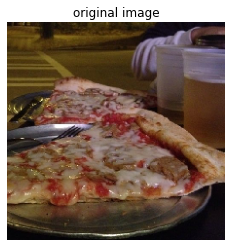

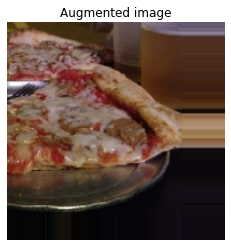

In [ ]:
# show orininal image and augmented image
random_number = random.randint(0,32) #batch size
plt.figure()
print(f"showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"original image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [ ]:
# Create the model
model_6 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
        optimizer=Adam(),
        metrics=["accuracy"])
history_6 = model_6.fit(train_data_augmented,
              epochs=5,
              steps_per_epoch=len(train_data_augmented),
              validation_data=test_data,
              validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 469ms/step - loss: 0.7094 - accuracy: 0.4847 - val_loss: 0.6903 - val_accuracy: 0.5820
Epoch 2/5
47/47 [==============================] - 22s 460ms/step - loss: 0.6953 - accuracy: 0.4567 - val_loss: 0.6883 - val_accuracy: 0.5360
Epoch 3/5
47/47 [==============================] - 23s 483ms/step - loss: 0.6924 - accuracy: 0.5767 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 22s 459ms/step - loss: 0.7015 - accuracy: 0.5133 - val_loss: 0.6791 - val_accuracy: 0.5180
Epoch 5/5
47/47 [==============================] - 22s 467ms/step - loss: 0.6872 - accuracy: 0.5400 - val_loss: 0.6423 - val_accuracy: 0.7200


In [ ]:
# check out models training curves
plot_loss_curves(history_6)

NameError: ignored

In [ ]:
train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                target_size=(224,224),
                                batch_size=32,
                                class_mode="binary",
                                shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:

# Create the model
model_7 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
        optimizer=Adam(),
        metrics=["accuracy"])
history_7 = model_7.fit(train_data_augmented_shuffled,
              epochs=5,
              steps_per_epoch=len(train_data_augmented_shuffled),
              validation_data=test_data,
              validation_steps=len(test_data))



Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6668 - accuracy: 0.5807 - val_loss: 0.5706 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 21s 456ms/step - loss: 0.5973 - accuracy: 0.6773 - val_loss: 0.4335 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 21s 456ms/step - loss: 0.5247 - accuracy: 0.7333 - val_loss: 0.3745 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 21s 454ms/step - loss: 0.5030 - accuracy: 0.7580 - val_loss: 0.3647 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 21s 448ms/step - loss: 0.4843 - accuracy: 0.7673 - val_loss: 0.3878 - val_accuracy: 0.8300


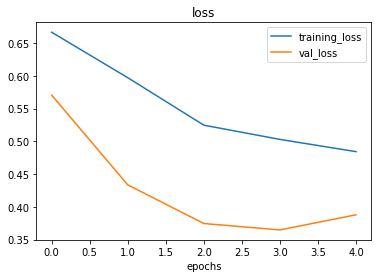

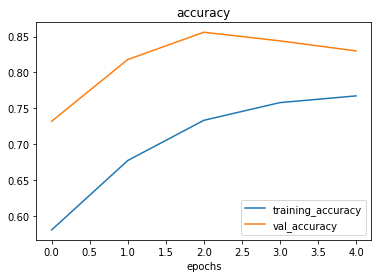

In [ ]:
# check out models training curveseeeg
plot_loss_curves(history_7)

### 7. Repreat until satisfied

A few things to improve our model:
1. Increase the number of model layers (e.g. more 'Conv2D'/'MaxPool2D' layers)
2. Increase the number of filters (10 --> 32/64)
3. Train for longer (more epochs)
4. Find an ideal learning rate
5. Get more data
6. Use **transfer learning** to leverage what another image hodel has learnt and adjust it for our own use case

In [ ]:
# Create the model
model_8 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
        optimizer=Adam(),
        metrics=["accuracy"])
history_8 = model_8.fit(train_data_augmented_shuffled,
              epochs=5,
              steps_per_epoch=len(train_data_augmented_shuffled),
              validation_data=test_data,
              validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 25s 509ms/step - loss: 0.6818 - accuracy: 0.5527 - val_loss: 0.6497 - val_accuracy: 0.5720
Epoch 2/5
47/47 [==============================] - 21s 457ms/step - loss: 0.5923 - accuracy: 0.6840 - val_loss: 0.4266 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 22s 462ms/step - loss: 0.5181 - accuracy: 0.7533 - val_loss: 0.3724 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 22s 458ms/step - loss: 0.4735 - accuracy: 0.7900 - val_loss: 0.3415 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 22s 465ms/step - loss: 0.4645 - accuracy: 0.7913 - val_loss: 0.3716 - val_accuracy: 0.8440


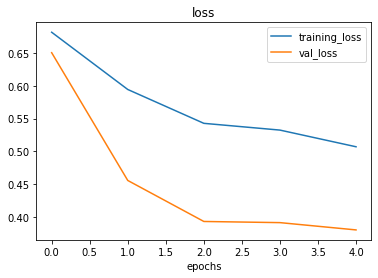

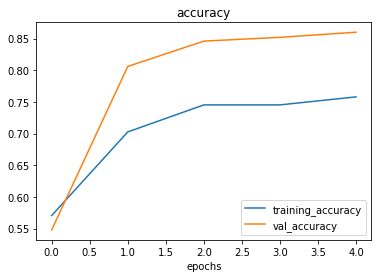

In [ ]:
# check out models training curveseeeg
plot_loss_curves(history_8)

### Marking a prediction with our trained model on our own custom data

In [ ]:
print(class_names)

['pizza' 'steak']


--2022-10-13 00:09:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2022-10-13 00:09:24 (179 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

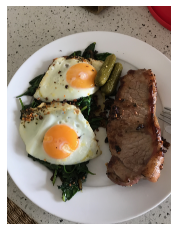

In [ ]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak=mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
# create a function to import image and resize it to be able to be used in the model
def load_and_prep_image(filename, img_shape=224):
  """
  read an image from filename, turns it into a tensor and reshape it
  to (image_shape, image_shape, color_channels)
  """
  # read in the image
  img = tf.io.read_file(filename)
  # decode the read file into a tensor
  img = tf.image.decode_image(img)
  # resize the image
  img = tf.image.resize(img,size=[img_shape,img_shape])
  # rescale the image (pixel values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# load in and preprocess custom image
steak = load_and_prep_image("03-steak.jpeg")

In [ ]:
pred = model_8.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 19ms/step


In [ ]:
# index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  import and image, make a prediction with model and plots the image
  with the predicted class as the title
  """
  # import the target image and preprocess it
  img = load_and_prep_image(filename)
  # make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))
  # get the predicted class
  pred_class = class_names[int(tf.round(pred))]
  # plot the image
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)
  return 0

1/1 [==============================] - 0s 19ms/step


0

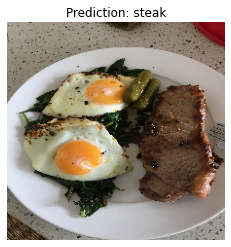

In [ ]:
pred_and_plot(model_8,"03-steak.jpeg")

--2022-10-13 00:34:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-10-13 00:34:40 (242 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]

1/1 [==============================] - 0s 124ms/step


0

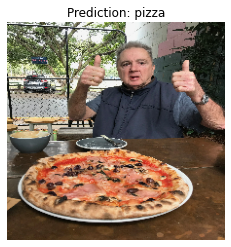

In [ ]:
#Try a pizza
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8,"03-pizza-dad.jpeg")